In [1]:
import numpy as np
import pandas as pd
from scipy import stats
data=pd.read_csv(r"C:\Users\User\Downloads\CarPrice_Assignment.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

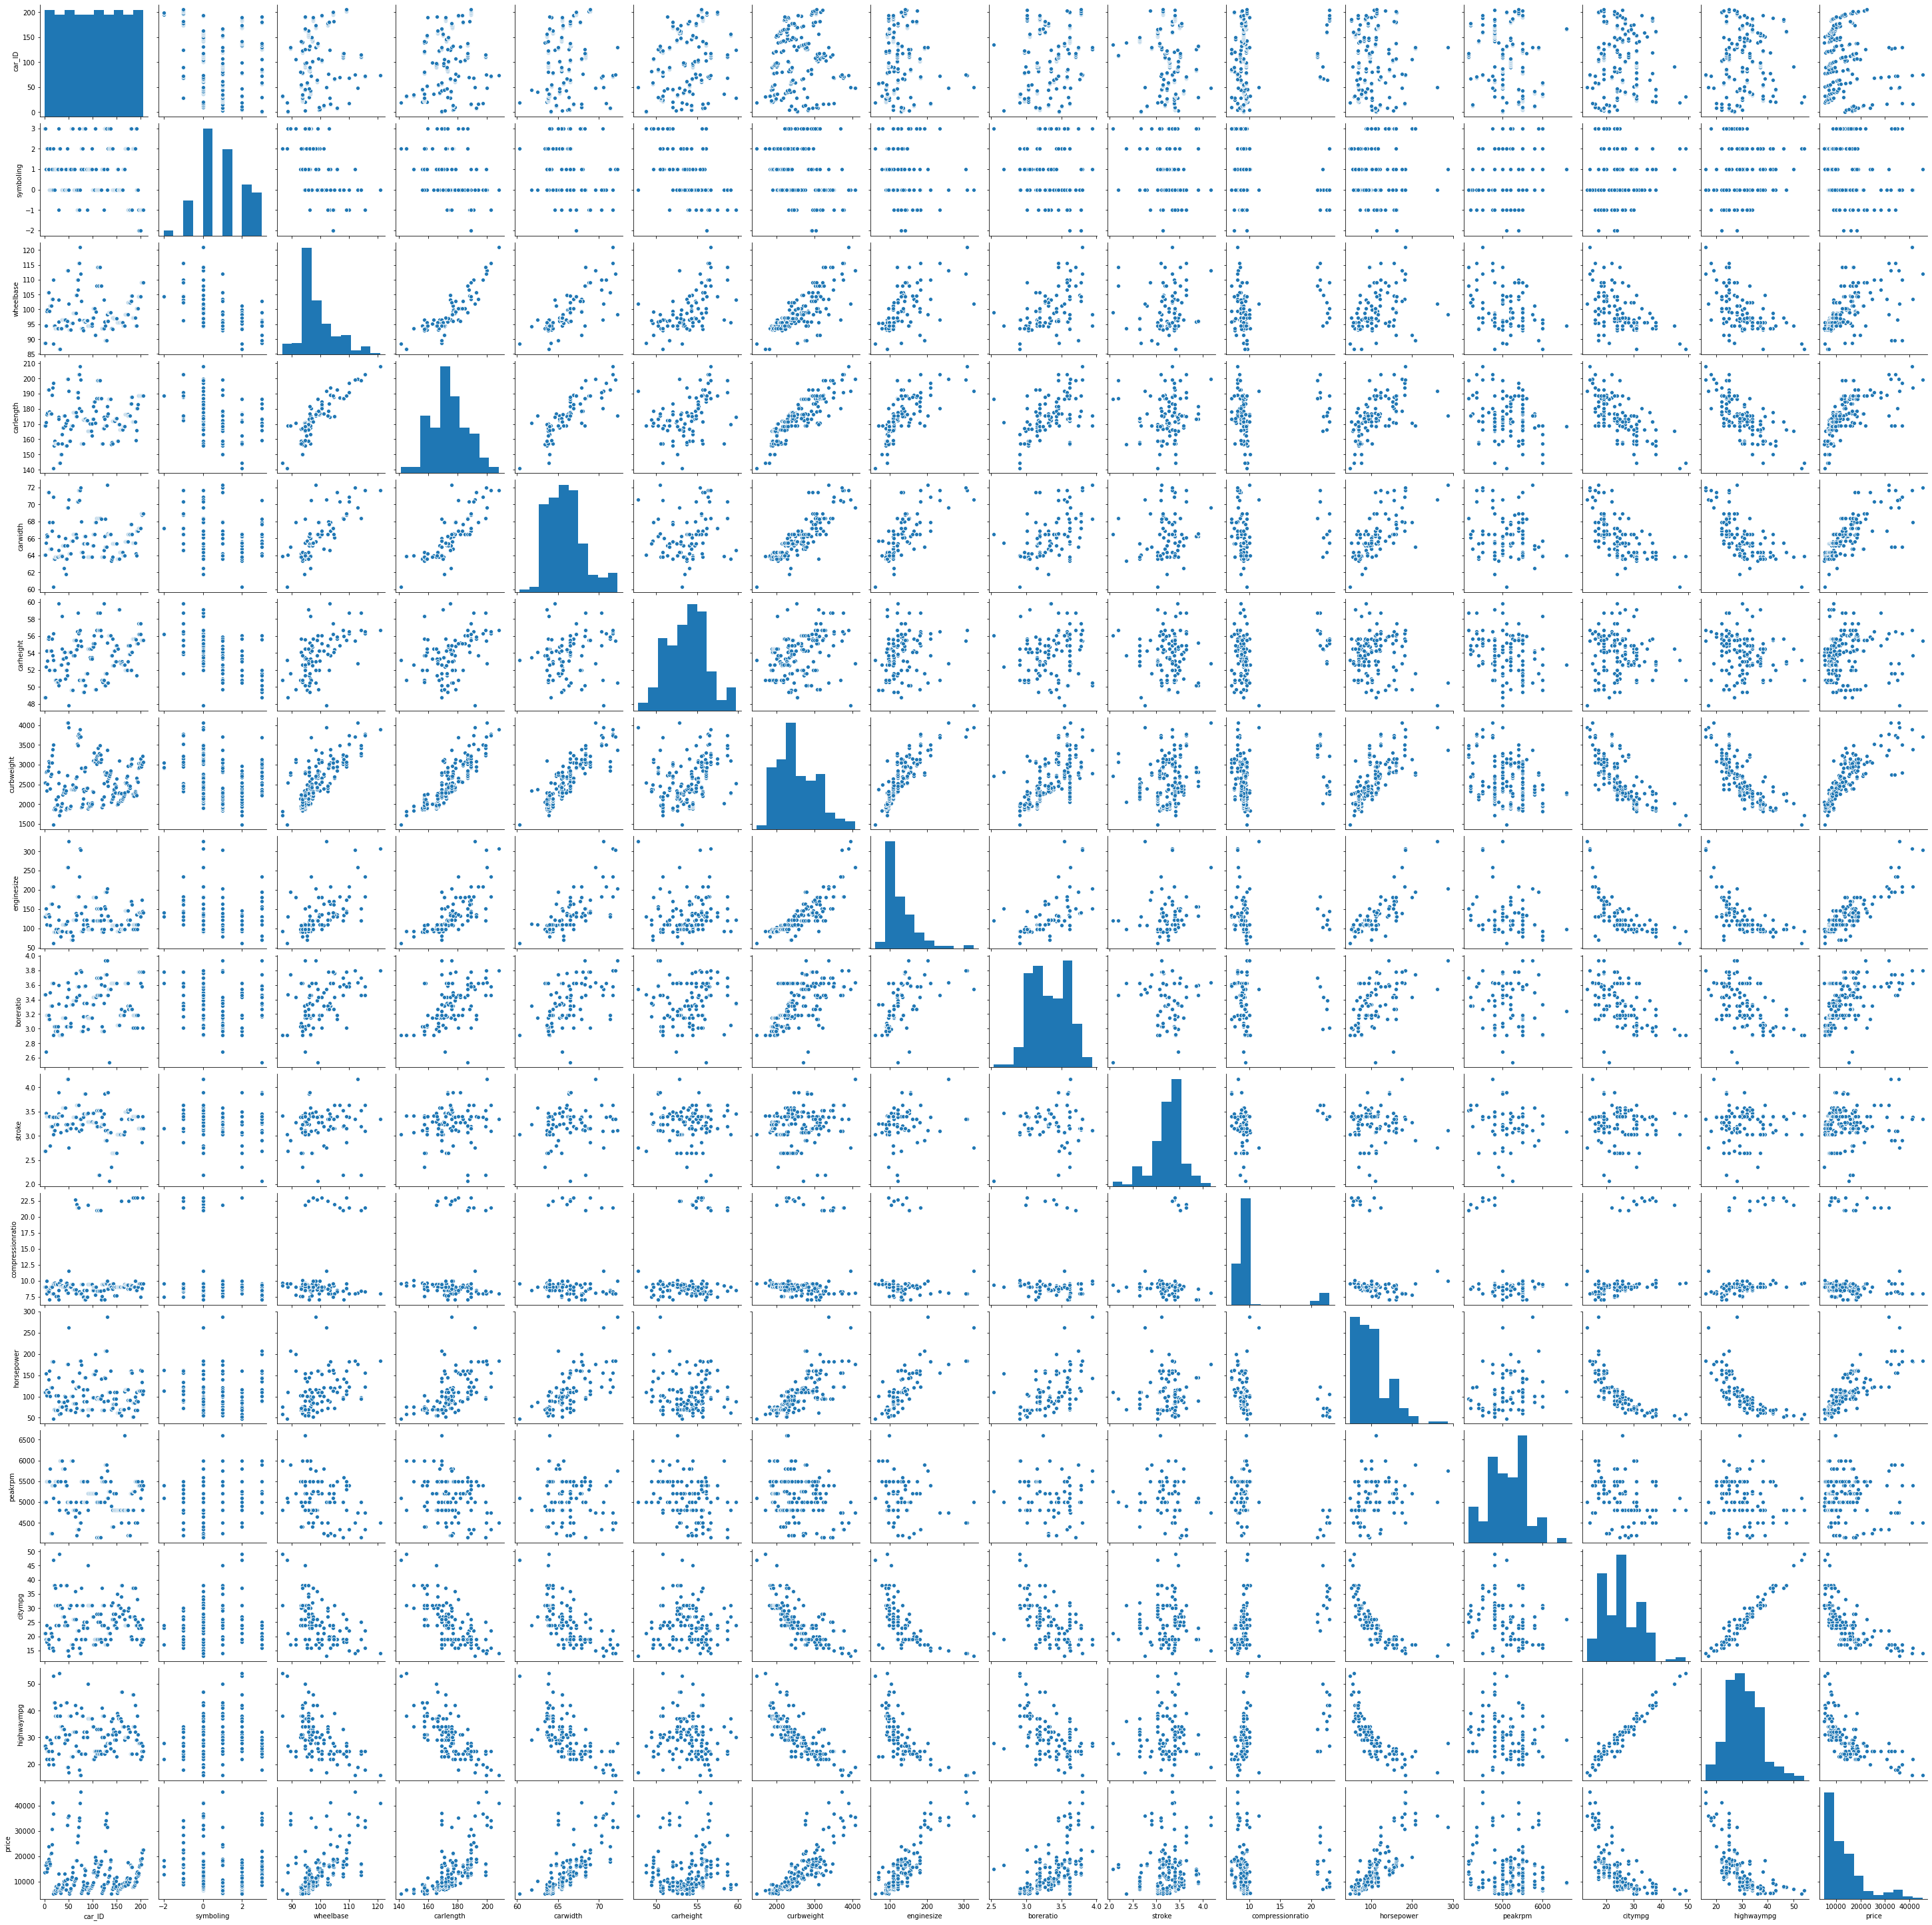

In [4]:
import seaborn as sns
sns.pairplot(data)

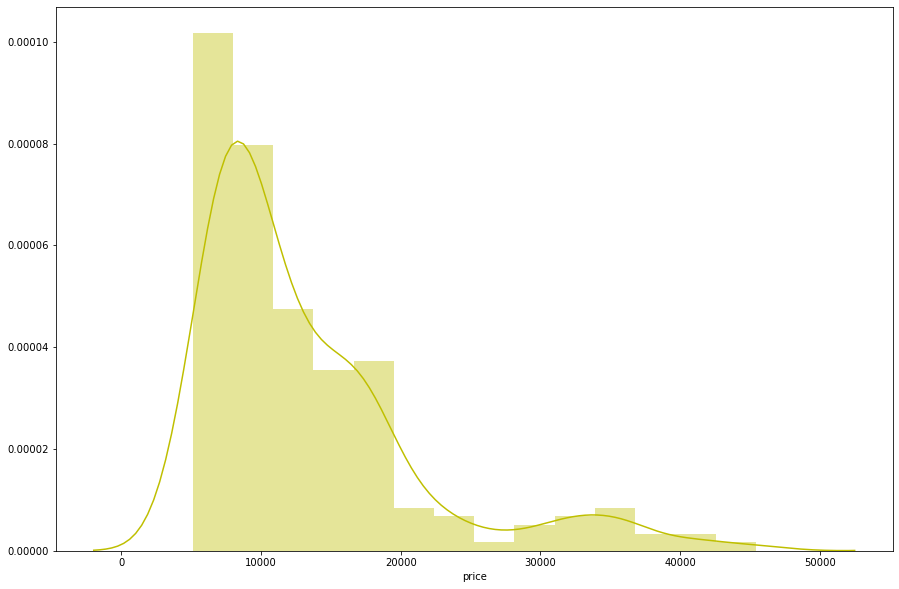

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.distplot(data['price'],color="y")

Text(0, 0.5, 'Frequency')

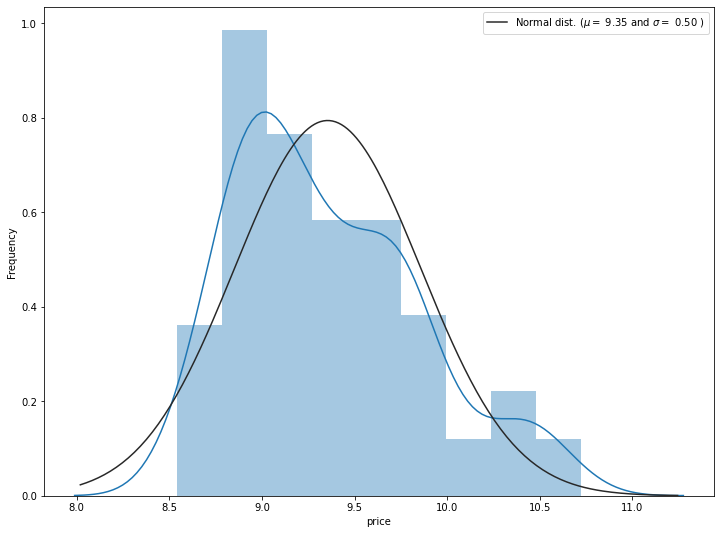

In [6]:
#we use log function which is in numpy
data['price'] = np.log1p(data['price'])

#Check again for more normal distribution

plt.subplots(figsize=(12,9))
sns.distplot(data['price'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(data['price'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')


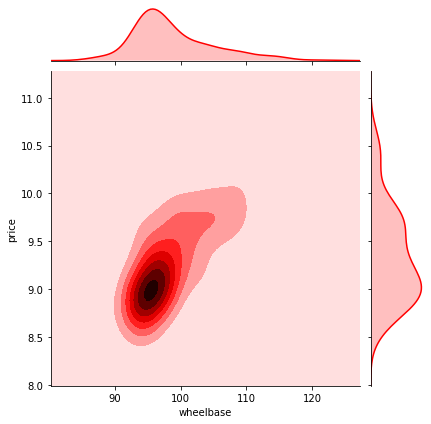

In [7]:
sns.jointplot(x='wheelbase', y='price', data=data, kind='kde', color='red')

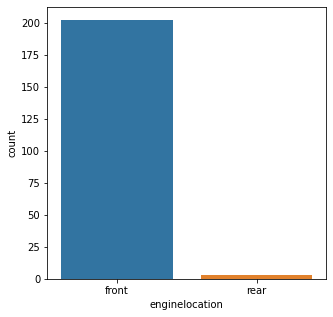

In [8]:
plt.figure(figsize=(5,5))
sns.countplot(data['enginelocation'])

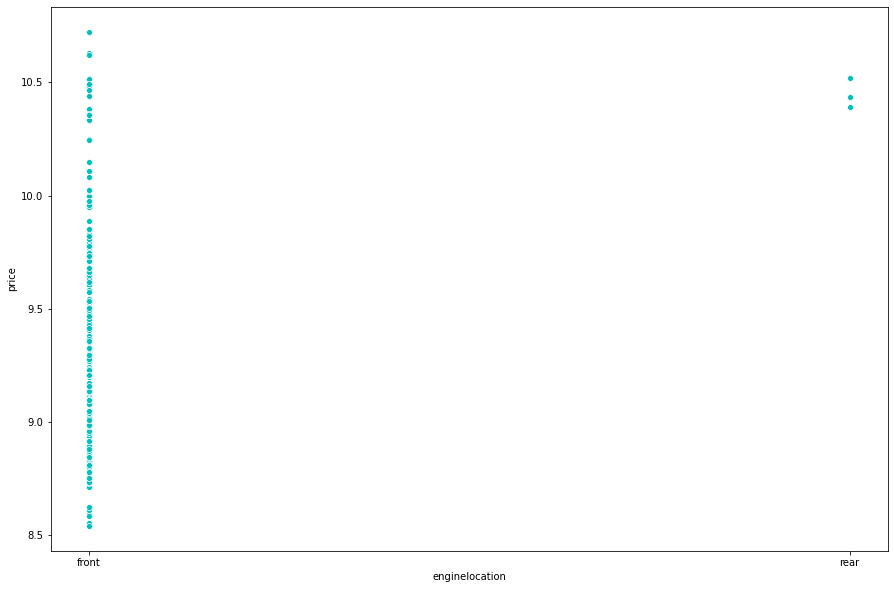

In [9]:
plt.figure(figsize=(15,10))
sns.scatterplot(data.enginelocation,data['price'],color=['c'])

In [10]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
data['fuelsystem']=lab.fit_transform(data['fuelsystem'])
data['cylindernumber']=lab.fit_transform(data['cylindernumber'])
data['enginetype']=lab.fit_transform(data['enginetype'])
data['enginelocation']=lab.fit_transform(data['enginelocation'])
data['drivewheel']=lab.fit_transform(data['drivewheel'])
data['carbody']=lab.fit_transform(data['carbody'])
data['doornumber']=lab.fit_transform(data['doornumber'])
data['aspiration']=lab.fit_transform(data['aspiration'])
data['fueltype']=lab.fit_transform(data['fueltype'])
data['CarName']=lab.fit_transform(data['CarName'])

In [11]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,9.510149
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,9.711176
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,9.711176
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,9.543306
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,9.767152


In [12]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

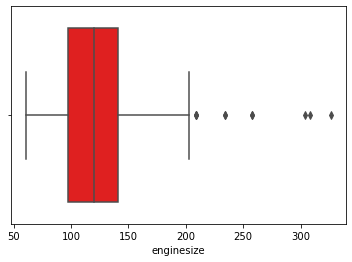

In [13]:
sns.boxplot(data['enginesize'],color='red')

In [14]:
data['enginesize']=data['enginesize'].rank()

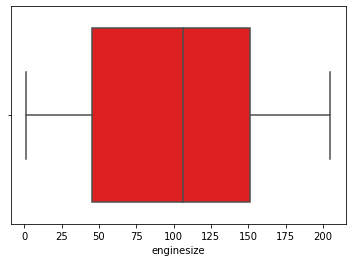

In [15]:
sns.boxplot(data['enginesize'],color='red')

In [16]:
corr=data.corr()
corr.style.background_gradient(cmap="inferno")

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.967077,-0.125568,0.067729,-0.190352,0.098303,0.051406,0.051483,0.129729,0.170636,0.052387,0.255960,0.071962,-0.075130,-0.040912,0.089132,0.204898,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.044496
symboling,-0.151621,1.000000,-0.107095,0.194311,-0.059866,0.664073,-0.596135,-0.041671,0.212471,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,0.050372,0.197762,-0.130244,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.088716
CarName,0.967077,-0.107095,1.000000,-0.069435,0.019914,-0.171745,0.099691,-0.016129,0.055968,0.014550,0.053016,-0.075349,0.201900,-0.049407,-0.090381,0.047154,-0.025629,0.123845,0.188598,-0.181775,0.101730,-0.092131,-0.138309,0.093437,0.102895,-0.161591
fueltype,-0.125568,0.194311,-0.069435,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,-0.212679,-0.233880,-0.284631,-0.217275,0.082695,0.110617,-0.132254,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.132638
aspiration,0.067729,-0.059866,0.019914,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,0.234539,0.300567,0.087311,0.324902,-0.102963,-0.133119,0.231432,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.257435
doornumber,-0.190352,0.664073,-0.171745,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,-0.398568,-0.207168,-0.552208,-0.197379,0.062431,0.154322,-0.083897,0.015519,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.086613
carbody,0.098303,-0.596135,0.099691,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,0.334433,0.131710,0.568534,0.128467,-0.037024,-0.048408,-0.039676,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.031444
drivewheel,0.051406,-0.041671,-0.016129,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,0.485649,0.470751,-0.019719,0.575111,-0.116823,0.223238,0.539071,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.609988
enginelocation,0.051483,0.212471,0.055968,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,-0.050989,-0.051698,-0.106234,0.050468,0.114127,0.135541,0.185560,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.265137
wheelbase,0.129729,-0.531954,0.014550,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,0.874587,0.795144,0.589435,0.776386,-0.135577,-0.184596,0.590339,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.629399


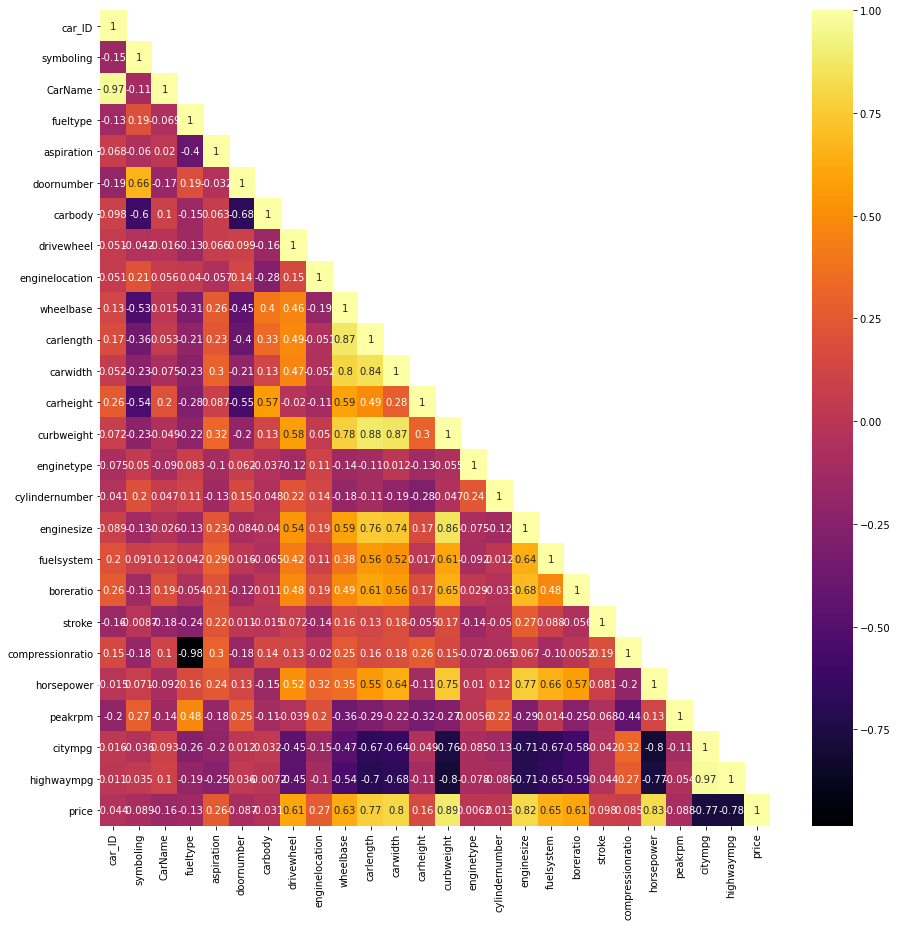

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap='inferno',mask=np.triu(data.corr(),k=1))

# Linear Regression

In [18]:
X = data.drop(['car_ID', 'price'], axis=1)
y = data['price']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=4)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
reg = LinearRegression()

In [23]:
reg.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = reg.predict(X_test)

In [25]:
from sklearn import metrics

In [26]:
metrics.r2_score(y_test, y_pred)

0.9066530289832105

In [27]:
metrics.mean_squared_error(y_test, y_pred)

0.02332792305335841

In [28]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.15273481284028997

In [29]:
reg.score(X_train, y_train)

0.9160087640235676

In [30]:
reg.score(X_test, y_test)

0.9066530289832105

In [31]:
reg.coef_

array([ 4.38435685e-03, -1.90476176e-03,  1.26751976e-01, -2.90179192e-02,
       -3.59745799e-02, -3.27273994e-02,  5.84691681e-02,  5.53630355e-01,
        1.51355850e-03,  4.18485738e-03,  2.57546723e-02,  1.22405563e-02,
        3.22810772e-04,  1.50781434e-02,  2.50652531e-03,  4.86972260e-05,
        2.42864727e-02, -1.45965345e-02, -6.34964526e-02,  2.31795155e-02,
        3.60010881e-03,  1.78367917e-05, -6.61898260e-03,  2.53517440e-03])

In [32]:
reg.intercept_

4.854473025288698

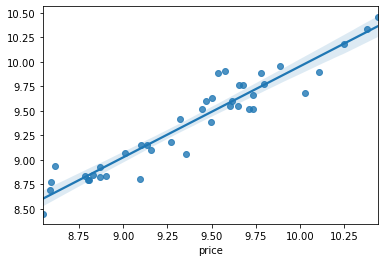

In [33]:
sns.regplot(y_test, y_pred)

# LGBM Regressor

In [34]:
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV,RandomizedSearchCV

In [36]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_squared_log_error,make_scorer
from sklearn.pipeline import make_pipeline

In [38]:
mod=LGBMRegressor(n_estimators=40)
model=make_pipeline(mod)
model.fit(X,y)
print(model)
kfold=KFold(n_splits=5)
score=cross_val_score(model,X,y,cv=kfold)
print(score)
yp=model.predict(X_train)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(mean_squared_log_error(y_test,y_pred))

Pipeline(steps=[('lgbmregressor', LGBMRegressor(n_estimators=40))])
[0.82303331 0.80105133 0.55162021 0.78484626 0.61083095]
0.9066530289832105
0.02332792305335841
0.00021550501271108138


# Random Forest Regressor

In [41]:
mod=RandomForestRegressor(n_estimators=100)
model=make_pipeline(mod)
print(model)
kfold=KFold(n_splits=5)
model.fit(X,y)
score=cross_val_score(model,X,y,cv=kfold)
print(score)
yp=model.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(mean_squared_log_error(y_test,y_pred))

Pipeline(steps=[('randomforestregressor', RandomForestRegressor())])
[0.85307114 0.91981877 0.72134126 0.86682023 0.76906079]
0.9066530289832105
0.02332792305335841
0.00021550501271108138
